In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1278


In [2]:
using DelimitedFiles
using DataFrames
using Plots
using Dates
using Printf
pyplot()

Plots.PyPlotBackend()

## Comparing Simulation to Johns Hopkins Reported Data
### Seattle (Really, King County)

In [4]:
jhcases,jhfirst, jhlast = get_real_data()
jhdead, _, _ = get_real_data(series="dead")

(dat = (dat = Any[1001.0 "Autauga, Alabama, US" … 22 22; 1003.0 "Baldwin, Alabama, US" … 29 29; … ; 56043.0 "Washakie, Wyoming, US" … 0 0; 56045.0 "Weston, Wyoming, US" … 0 0], first = CovidSim.Col_ref("1/22/20", 3), last = CovidSim.Col_ref("8/14/20", 208)), first = first, last = last)

In [5]:
n = jhcases.last.col - jhcases.first.col + 1; println(jhcases.first, " ", jhcases.last); println(n)

CovidSim.Col_ref("1/22/20", 3) CovidSim.Col_ref("8/14/20", 208)
206


Get our locales.

In [54]:
seattle = (;fips=53033); newyork=(;fips=36061); bismarck=(;fips=38015); 

In [55]:
sea = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=seattle.fips)
rename!(sea, [:sea_infected, :sea_dead])
nyc = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=newyork.fips)
rename!(nyc, [:nyc_infected, :nyc_dead])
bis = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=bismarck.fips)
rename!(bis, [:bis_infected, :bis_dead])
tricities = hcat(sea, nyc, bis)

,sea_infected,sea_dead,nyc_infected,nyc_dead,bis_infected,bis_dead
,Any,Any,Any,Any,Any,Any
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [56]:
dt = CovidSim.setup_dt("../parameters/dec_tree_all.csv");

#### Run a simulation for the tricities

In [57]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#85"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [93]:
alldict, env, series = run_a_sim(n, seattle.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
at day 10 r0 = 1.34
at day 20 r0 = 1.36
at day 30 r0 = 1.41
at day 40 r0 = 1.41
at day 50 r0 = 1.41
at day 60 r0 = 1.41
at day 70 r0 = 1.37
at day 80 r0 = 1.29
at day 90 r0 = 1.05
at day 100 r0 = 0.76
at day 110 r0 = 0.58
at day 120 r0 = 0.48
at day 130 r0 = 0.44
at day 140 r0 = 0.44
at day 150 r0 = 0.43
at day 160 r0 = 0.41
at day 170 r0 = 0.43
at day 180 r0 = 0.42
at day 190 r0 = 0.41
at day 200 r0 = 0.38


In [94]:
geo = alldict["geo"]

15×10 Array{Any,2}:
  6075  "San Francisco"  "San Francisco"  …  2020-02-15  1.04109
 53033  "Seattle"        "Seattle"           2020-03-15  0.931603
 36061  "New York"       "New York"          2020-03-15  1.25
 39035  "Cuyahoga"       "Cleveland"         2020-03-15  0.912462
 48113  "Dallas"         "Dallas"            2020-03-15  0.920954
 39151  "Stark"          "Canton"         …  2020-03-15  0.9
 34013  "Essex"          "Newark"            2020-03-15  0.942669
 13089  "DeKalb"         "Atlanta"           2020-03-15  0.909244
 17167  "Sangamon"       "Springfield"       2020-03-15  0.900535
 38015  "Burleigh"       "Bismarck"          2020-03-15  0.904251
  4013  "Maricopa"       "Phoenix"        …  2020-03-25  0.91006
 42003  "Allegheny"      "Pittsburgh"        2020-03-25  0.934195
 27053  "Hennepin"       "Minneapolis"       2020-03-25  0.955584
 31055  "Douglas"        "Omaha"             2020-03-25  0.915317
  8031  "Denver"         "Denver"            2020-03-25  0.925667

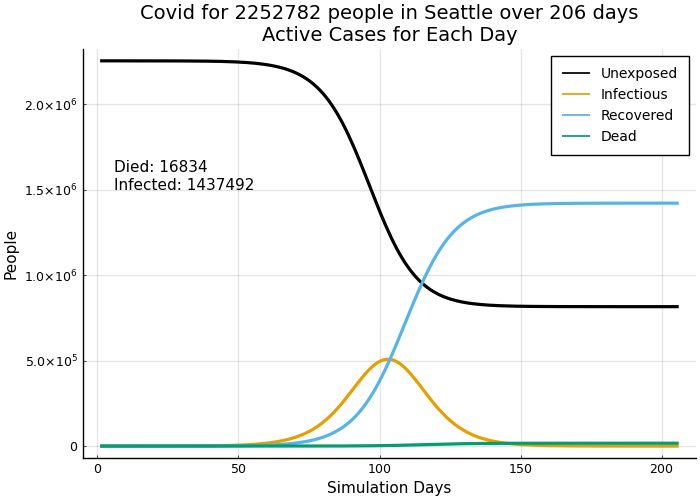

In [95]:
cumplot(series,seattle.fips,geo=geo)

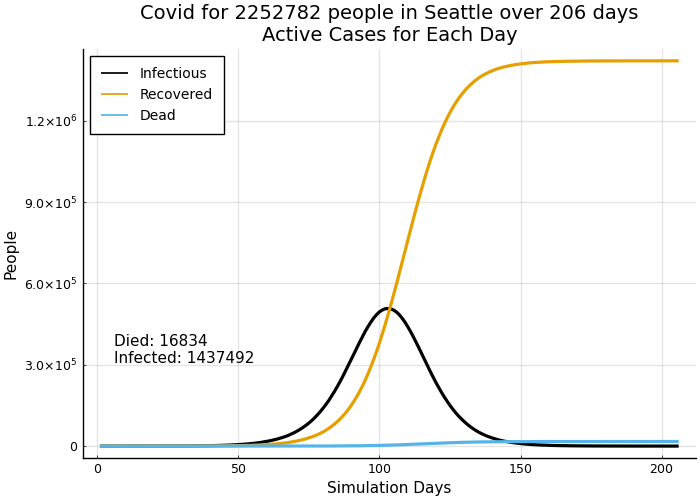

In [96]:
cumplot(series,seattle.fips,[infectious, recovered, dead],geo=geo)

In [97]:
sea_outcome = virus_outcome(series, seattle.fips, base=:pop)
for k in keys(sea_outcome)
    @printf("%12s %f\n", k, sea_outcome[k])
end

Dict{String,Float64} with 4 entries:
  "unexposed"   => 0.361904
  "dead"        => 0.00747255
  "recovered"   => 0.630616
  "totinfected" => 0.638096

In [128]:
sea_outcome = virus_outcome(series, seattle.fips, base=:none)
for k in keys(sea_outcome)
    @printf("%12s %d\n", k, sea_outcome[k])
end

   unexposed 2081351
        dead 1411
   recovered 137038
 totinfected 171428


#### Let's put some moderate social distancing in place around March 23
This reduces R0 from around 2.0 to around 1.2. Still, some growth but much slower...

In [98]:
str_50 = sd_gen(start=50, comply=.75, cf=(.2,1.3), tf=(.18,.44))

(::CovidSim.var"#sd_mod#97"{CovidSim.var"#sd_mod#96#98"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [99]:
alldict, env, series = run_a_sim(n, seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....


In [100]:
sim_r0(env, alldict["dt"], alldict["decpoints"])

0.71

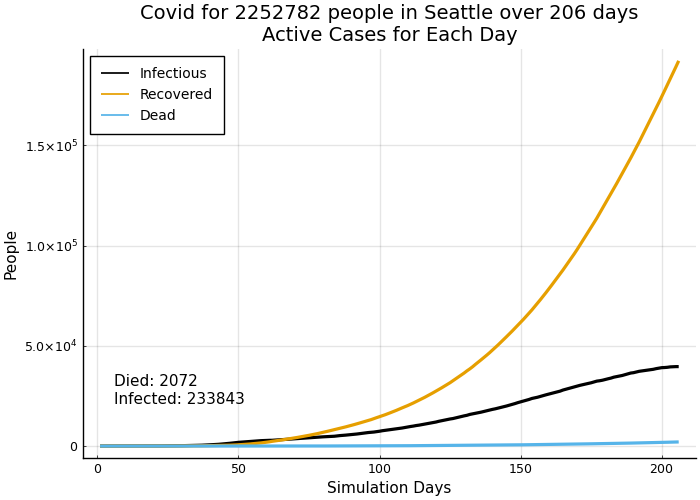

In [101]:
cumplot(series,seattle.fips,[infectious, recovered, dead],geo=geo)

#### What is the difference between active cases and reported cases?

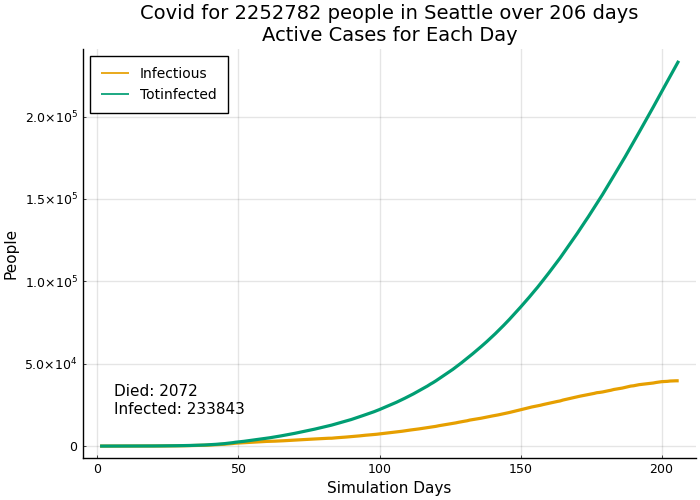

In [102]:
cumplot(series,seattle.fips,[infectious, totinfected], geo=geo)

#### What's going on here?
Infectious shows the *active* cases: the people on each day who are, on that day, actively infected. People who have recovered or (sadly) have died are not included--they're not infected any more.

Totinfected shows the cumulative total of all the people who have ever become infected. This is what popular web dashboards and news sites show to depict growth and compare different places. Why don't they show *active* infected cases?  ...because they can't... They could subtract out the reported deaths, but that wouldn't make much difference, except in Italy or New York City. They don't know how many people have recovered because public health jurisdictions are challenged to accurately tracks this data.  When "anti-body" tests are reliably accurate and broadly available, then a few jurisdictions may begin to sample the population with anti-body tests. But, that is looking quite difficult because such tests are proving to be very unreliable. 

Total cumulative infected is easier to track, if not accurately, and easier to compare across locations. In the early stages of the spread of infection, it focuses on what everyone wants to know: is the virus growing and how fast is it growing.  It tends to exaggerate the state of things because the line goes up steeply and never goes down--it can only become flat. 

Active infected cases *will* go down and it shows the effect of so-called herd immunity: When there are many recovered and temporarily and partially immune people in the population, the virus spread slows down because there are fewer hosts available. Eventually, this will protect many other people as the spread becomes very slow and active virus in hosts dies out.

#### Align simulation and reported series on a day when equal numbers of deaths were reached

In [131]:
target = 20
sim_dead = Date("2020-01-22") + Day(findfirst(series[seattle.fips][:cum][:,map2series.dead[6]] .>= target))
rpt_dead = Date("2020-01-22") + Day(findfirst(tricities[:, :sea_dead] .>= target))
adjdays = Dates.value(sim_dead - rpt_dead)
@show sim_dead, rpt_dead, adjdays

(sim_dead, rpt_dead, adjdays) = (Date("2020-03-28"), Date("2020-03-11"), 17)


(Date("2020-03-28"), Date("2020-03-11"), 17)

In [132]:
println(Dates.value(rpt_dead - Date("2020-01-22")), " ", Dates.value(sim_dead - Date("2020-01-22")))

49 66


In [133]:
println(tricities[Dates.value(rpt_dead - Date("2020-01-22")),:sea_dead], " ", 
    series[seattle.fips][:cum][Dates.value(sim_dead - Date("2020-01-22")),map2series.dead[6]])

21 20


In [134]:
rundays = n + adjdays
# rundays = if adjdays >= 0
#                 n + adjdays
#             else   # adjdays < 0
#                 n - adjdays
#             end

223

In [135]:
alldict, env, series = run_a_sim(rundays, seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....


In [136]:

plotcases = if adjdays >= 0
    series[seattle.fips][:cum][1+adjdays:n+adjdays,map2series.totinfected[6]] # offset towards past (left)
else
    vcat(zeros(Int, adjdays),series[seattle.fips][:cum][1:rundays, map2series.totinfected[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
    128
    150
    171
    192
    208
    230
    267
    311
    353
    402
    447
    514
    579
      ⋮
 345657
 348392
 351068
 353721
 356325
 358913
 361489
 363968
 366437
 368961
 371402
 373898

#### Simulated vs. Reported Cases

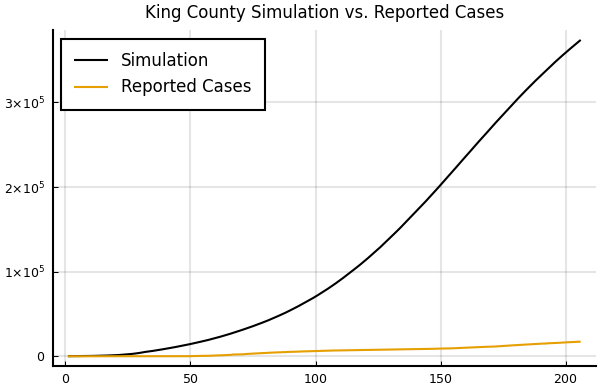

In [137]:
# plot(1:n, series[seattle.fips][:cum][1+adjdays:n+adjdays,map2series.totinfected[6]], label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot(1:n, plotcases, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:sea_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs. Reported Cases", titlefontsize=8)
# xlabel!("Days: Feb. 1 to April 30", guidefontsize=8)


In [138]:

sea_outcome = virus_outcome(series, seattle.fips, base=:pop)
for k in keys(sea_outcome)
    @printf("%12s %f\n", k, sea_outcome[k])
end

   unexposed 0.834028
        dead 0.001754
   recovered 0.149380
 totinfected 0.165972


## Which do you believe?
Is this plausible?  Let's think about it.  The simulation with social distancing results in about 91,000 cumulative total infected and 772 deaths for a death rate of 8 tenths of one percent. The reported results show only 6207 cumulative total infected and 447 deaths for a death rate of over 7%. 

Could we have unreported deaths in Seattle?  Even in the place with possibly the best and most honest approach to public health in the US, sure... Is it reasonable that Seattle's death rate is comparable to Italy's? Probably not. Let's split the difference on deaths and call it 600. Let's assume a moderately high death rate of 2%. This would mean Seattle really has 30,000 cases--so Seattle is underreporting by a factor of 5 and the simulation would be showing 3X the number cases rather than around 12X.

Even so, doesn't the simulation still seem too high?  The simulated infection rate is only at 4% of King County's population. That doesn't seem outrageous--in fact, it is probably still too low. The good news is that the real death rate is probably significantly lower than Seattle's reported death rate and King County is building towards "herd immunity" more rapidly than the reported cases would suggest.

This phenomenon is happening around the world with a respected article based estimating cases based on more accurate reported deaths. The article suggests that under-reporting in countries varies from 3X to more than 12X. 

In [139]:

plotdeaths = if adjdays >= 0
    series[seattle.fips][:cum][1+adjdays:n+adjdays,map2series.dead[6]] # offset towards past (left)
else
    vcat(zeros(Int, adjdays),series[seattle.fips][:cum][1:rundays, map2series.dead[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    ⋮
 3525
 3572
 3618
 3657
 3698
 3731
 3771
 3803
 3839
 3886
 3923
 3951

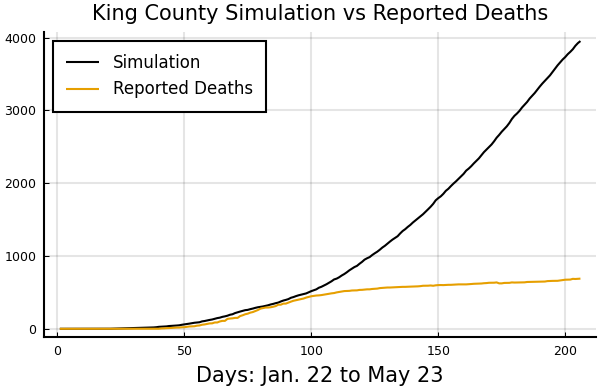

In [140]:
plot(1:n, plotdeaths, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, vcat(zeros(0),tricities[1:n-0, :sea_dead]), label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Jan. 22 to May 23", guidefontsize=10)


### Virtual New York City

In [141]:
alldict, env, series = run_a_sim(122, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.37
at day 20 r0 = 1.42
at day 30 r0 = 1.41
at day 40 r0 = 1.42
at day 50 r0 = 1.38
at day 60 r0 = 1.34
at day 70 r0 = 1.1
at day 80 r0 = 0.6
at day 90 r0 = 0.33
at day 100 r0 = 0.23
at day 110 r0 = 0.27
at day 120 r0 = 0.23


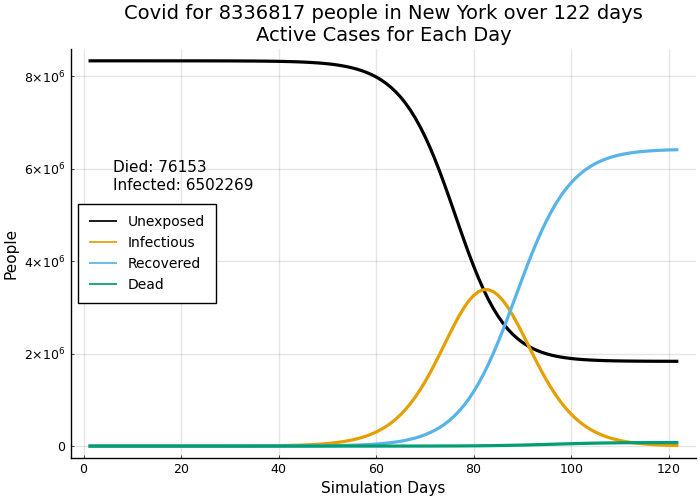

In [142]:
cumplot(series,newyork.fips,geo=geo)

Why does New York grow much faster than Seattle? Because it has a much higher population density.  The simulation uses population density as an input that influences the spread of the virus.

In [144]:
nyc_outcome = virus_outcome(series, newyork.fips, base=:pop)
for k in keys(nyc_outcome)
    @printf("%12s %f\n", k, nyc_outcome[k])
end

   unexposed 0.220054
        dead 0.009135
   recovered 0.769361
 totinfected 0.779946


## Let's do some social distancing

In [173]:
str_45_nyc = sd_gen(start=45, comply=.80, cf=(.2,1.1), tf=(.18,.44))
alldict, env, series = run_a_sim(n+adjdays, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_45_nyc],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.38
at day 20 r0 = 1.41
at day 30 r0 = 1.35
at day 40 r0 = 1.37
at day 50 r0 = 0.73
at day 60 r0 = 0.73
at day 70 r0 = 0.72
at day 80 r0 = 0.71
at day 90 r0 = 0.71
at day 100 r0 = 0.7
at day 110 r0 = 0.66
at day 120 r0 = 0.61
at day 130 r0 = 0.56
at day 140 r0 = 0.54
at day 150 r0 = 0.48
at day 160 r0 = 0.44
at day 170 r0 = 0.44
at day 180 r0 = 0.42
at day 190 r0 = 0.4
at day 200 r0 = 0.41


In [174]:
nyc_outcome = virus_outcome(series, newyork.fips, base=:pop)
for k in keys(nyc_outcome)
    @printf("%12s %f\n", k, nyc_outcome[k])
end

   unexposed 0.619867
        dead 0.004330
   recovered 0.366325
 totinfected 0.380133


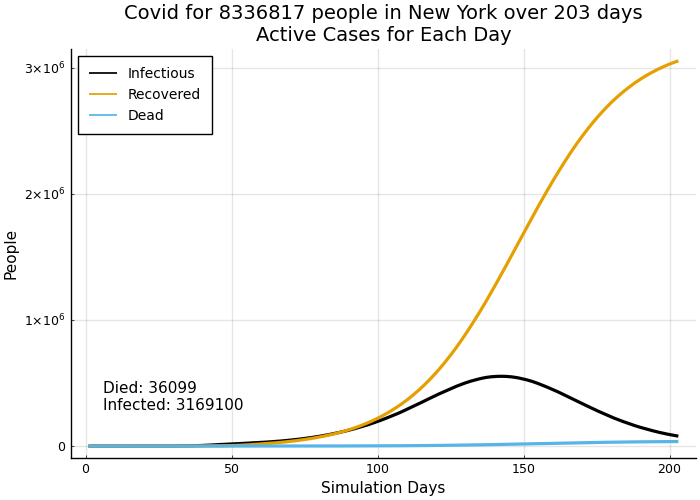

In [175]:
cumplot(series,newyork.fips,[infectious, recovered, dead], geo=geo)

#### Align simulation and reported series on the day when 50 deaths were reached

In [176]:
sim_dead = Date("2020-01-22") + Day(findfirst(series[newyork.fips][:cum][:,map2series.dead[6]] .>= target))
rpt_dead = Date("2020-01-22") + Day(findfirst(tricities[:, :nyc_dead] .>= target))
println("sim ", sim20dead," rept ", rpt20dead)
adjdays = Dates.value(sim_dead - rpt_dead)
@show sim_dead, rpt_dead, adjdays

sim 2020-03-16 rept 2020-03-19
(sim_dead, rpt_dead, adjdays) = (Date("2020-03-14"), Date("2020-03-18"), -4)


(Date("2020-03-14"), Date("2020-03-18"), -4)

In [177]:
rundays = n + adjdays


202

In [181]:
alldict, env, series = run_a_sim(rundays, newyork.fips, showr0=true, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_45_nyc],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
at day 10 r0 = 1.37
at day 20 r0 = 1.38
at day 30 r0 = 1.37
at day 40 r0 = 1.41
at day 50 r0 = 0.73
at day 60 r0 = 0.71
at day 70 r0 = 0.74
at day 80 r0 = 0.73
at day 90 r0 = 0.73
at day 100 r0 = 0.71
at day 110 r0 = 0.69
at day 120 r0 = 0.68
at day 130 r0 = 0.64
at day 140 r0 = 0.62
at day 150 r0 = 0.58
at day 160 r0 = 0.52
at day 170 r0 = 0.47
at day 180 r0 = 0.45
at day 190 r0 = 0.45
at day 200 r0 = 0.41


In [182]:
plotcases = if adjdays >= 0
    series[newyork.fips][:cum][1+adjdays:n+adjdays,map2series.totinfected[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[newyork.fips][:cum][1:rundays, map2series.totinfected[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
       0
       0
       0
       0
       6
       6
       6
       6
       6
       8
       9
      11
      13
       ⋮
 2932213
 2947029
 2961521
 2975035
 2988266
 3000768
 3012842
 3024137
 3035139
 3045694
 3055644
 3065067

### Simulation vs. Reported Total Cases

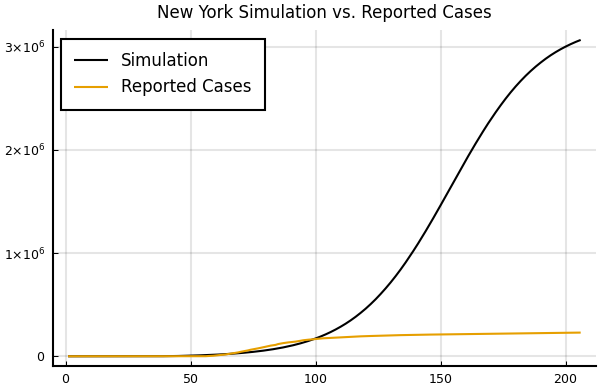

In [183]:
plot(1:n, plotcases, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:nyc_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("New York Simulation vs. Reported Cases", titlefontsize=8)

In [184]:
plotdeaths = if adjdays >= 0
    series[newyork.fips][:cum][1+adjdays:n+adjdays,map2series.dead[6]] # offset towards past (left)
else
    vcat(zeros(Int, abs(adjdays)),series[newyork.fips][:cum][1:rundays, map2series.dead[6]]) # offset to future and pad left with zeros
end

206-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
 29795
 30168
 30534
 30879
 31206
 31549
 31857
 32148
 32443
 32726
 33000
 33286

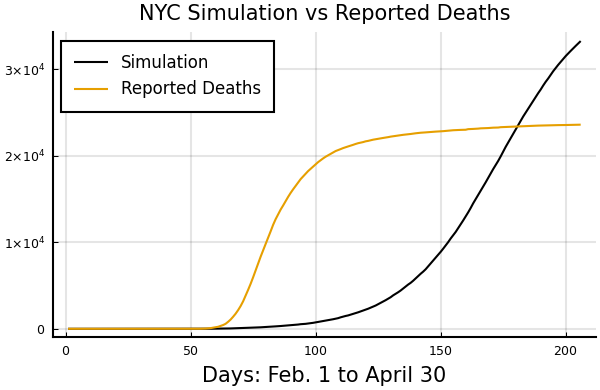

In [185]:
plot(1:n, plotdeaths, label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:n, tricities[:,:nyc_dead], label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("NYC Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=10)